In [32]:
import pandas as pd
import seaborn as sns

train_dataset = pd.read_csv('../NLP_dataset/train/train.csv')
test_dataset = pd.read_csv('../NLP_dataset/test/test_data.csv')

train_data = train.iloc[0]

print(f"Sentence: {train_data['sentence']}")
print(f"Subject_entity: {train_data['subject_entity']}")
print(f"Object_entity: {train_data['object_entity']}")
print(f"Label: {train_data['label']}")
print(f"Source: {train_data['source']}")

print(train.shape)
print(test.shape)

print(train['label'].unique())

Sentence: 〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
Subject_entity: {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
Object_entity: {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
Label: no_relation
Source: wikipedia
(32470, 6)
(7765, 6)
['no_relation' 'org:member_of' 'org:top_members/employees'
 'org:alternate_names' 'per:date_of_birth' 'org:place_of_headquarters'
 'per:employee_of' 'per:origin' 'per:title' 'org:members'
 'per:schools_attended' 'per:colleagues' 'per:alternate_names'
 'per:spouse' 'org:founded_by' 'org:political/religious_affiliation'
 'per:children' 'org:founded' 'org:number_of_employees/members'
 'per:place_of_birth' 'org:dissolved' 'per:parents' 'per:religion'
 'per:date_of_death' 'per:place_of_residence' 'per:other_family'
 'org:product' 'per:siblings' 'per:product' 'per:place_of_death']


In [33]:
train_dataset.duplicated(['sentence', 'subject_entity', 'object_entity']).sum()

47

<AxesSubplot: xlabel='label', ylabel='Count'>

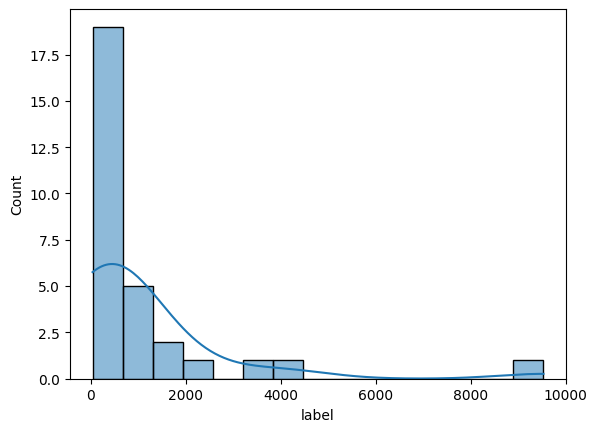

In [34]:
train_dataset_count = train_dataset['label'].value_counts()
sns.histplot(train_dataset_count, kde=True)

<AxesSubplot: xlabel='count', ylabel='label'>

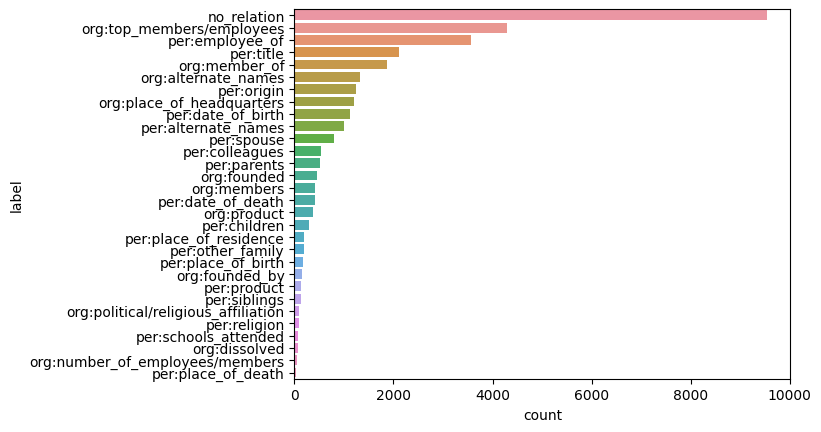

In [38]:
sns.countplot(y=train_dataset['label'], order = train_dataset['label'].value_counts().index)